### 1 a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd C:\Users\PoisonTree\Documents\Communities

C:\Users\PoisonTree\Documents\Communities


In [4]:
df_original = pd.read_csv("communities.csv", na_values=["?"]) #Reading the dataset in a dataframe using Pandas

In [5]:
df_original.columns

Index(['state', 'communityname', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseO

In [6]:
df_original.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [7]:
df_original.shape

(1994, 100)

In [8]:
df = df_original.ix[:,'population':'PctUsePubTrans']

In [9]:
df.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [10]:
df.shape

(1994, 97)

In [11]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 200

In [12]:
df.dtypes

population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap              float64
HispPerCap               float64
NumUnderPov              float64
PctPopUnderPov           float64
PctLess9thGrade          float64
PctNotHSGr

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994,0.057593,0.126906,0,0.0100,0.020,0.0500,1
householdsize,1994,0.463395,0.163717,0,0.3500,0.440,0.5400,1
racepctblack,1994,0.179629,0.253442,0,0.0200,0.060,0.2300,1
racePctWhite,1994,0.753716,0.244039,0,0.6300,0.850,0.9400,1
racePctAsian,1994,0.153681,0.208877,0,0.0400,0.070,0.1700,1
racePctHisp,1994,0.144022,0.232492,0,0.0100,0.040,0.1600,1
agePct12t21,1994,0.424218,0.155196,0,0.3400,0.400,0.4700,1
agePct12t29,1994,0.493867,0.143564,0,0.4100,0.480,0.5400,1
agePct16t24,1994,0.336264,0.166505,0,0.2500,0.290,0.3600,1
agePct65up,1994,0.423164,0.179185,0,0.3000,0.420,0.5300,1


In [14]:
df.shape

(1994, 97)

In [15]:
otherpercap_mean = df.OtherPerCap.mean()

In [16]:
df.OtherPerCap.fillna(otherpercap_mean, axis=0, inplace=True)

In [17]:
df[df.OtherPerCap.isnull()].T


""
population
householdsize
racepctblack
racePctWhite
racePctAsian
racePctHisp
agePct12t21
agePct12t29
agePct16t24
agePct65up


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994,0.057593,0.126906,0,0.0100,0.020,0.0500,1
householdsize,1994,0.463395,0.163717,0,0.3500,0.440,0.5400,1
racepctblack,1994,0.179629,0.253442,0,0.0200,0.060,0.2300,1
racePctWhite,1994,0.753716,0.244039,0,0.6300,0.850,0.9400,1
racePctAsian,1994,0.153681,0.208877,0,0.0400,0.070,0.1700,1
racePctHisp,1994,0.144022,0.232492,0,0.0100,0.040,0.1600,1
agePct12t21,1994,0.424218,0.155196,0,0.3400,0.400,0.4700,1
agePct12t29,1994,0.493867,0.143564,0,0.4100,0.480,0.5400,1
agePct16t24,1994,0.336264,0.166505,0,0.2500,0.290,0.3600,1
agePct65up,1994,0.423164,0.179185,0,0.3000,0.420,0.5300,1


In [19]:
target_df = df_original["ViolentCrimesPerPop"]
len(target_df)

1994

### b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation using the learned model and compare the final RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [20]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl

In [21]:
dftable = np.array(df)
dftable

array([[ 0.19,  0.33,  0.02, ...,  0.12,  0.26,  0.2 ],
       [ 0.  ,  0.16,  0.12, ...,  0.02,  0.12,  0.45],
       [ 0.  ,  0.42,  0.49, ...,  0.01,  0.21,  0.02],
       ..., 
       [ 0.16,  0.37,  0.25, ...,  0.08,  0.32,  0.18],
       [ 0.08,  0.51,  0.06, ...,  0.03,  0.38,  0.33],
       [ 0.2 ,  0.78,  0.14, ...,  0.11,  0.3 ,  0.05]])

In [22]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in dftable])
y = target_df

In [23]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [24]:
w = standRegres(x,y)

In [25]:
w

matrix([[  1.31108068e-01],
        [ -3.14114977e-02],
        [  2.09909670e-01],
        [ -4.05351612e-02],
        [ -1.38892919e-02],
        [  5.89726825e-02],
        [  1.23399025e-01],
        [ -2.22621600e-01],
        [ -1.47500199e-01],
        [  5.01635477e-02],
        [ -2.42413829e-01],
        [  4.64024392e-02],
        [ -1.96945615e-01],
        [ -2.06117500e-01],
        [  4.65935490e-02],
        [ -1.77212915e-01],
        [  6.30148504e-02],
        [  1.14942190e-02],
        [ -9.08951848e-02],
        [  2.74640044e-01],
        [  1.01752476e-01],
        [ -3.31517562e-01],
        [ -2.91799268e-02],
        [ -3.54483393e-02],
        [  2.26173855e-02],
        [  4.30950137e-02],
        [  3.44408548e-02],
        [  1.28412458e-01],
        [ -1.91293360e-01],
        [ -1.00769002e-01],
        [  6.46856092e-02],
        [  1.06062117e-01],
        [  2.44125992e-06],
        [  2.34984611e-01],
        [ -3.75705330e-02],
        [ -7.7495766

In [26]:
xMat=np.mat(x)
yMat=np.mat(y)
yHAT = xMat*w

In [28]:
# Let's see predictions for the first 10 instances
# p = np.array([linreg.predict(xi) for xi in x])
# p= yHat
print(yHAT[0:10])

[[ 0.16551838]
 [ 0.29062973]
 [ 0.38367799]
 [ 0.32270857]
 [-0.02129155]
 [ 0.23017938]
 [ 0.08800201]
 [ 0.4423392 ]
 [ 0.23747971]
 [ 0.00526097]]


In [29]:
print(yHAT)
print(type(yHAT))

[[ 0.16551838]
 [ 0.29062973]
 [ 0.38367799]
 ..., 
 [ 0.40142767]
 [ 0.16882645]
 [ 0.37326947]]
<class 'numpy.matrixlib.defmatrix.matrix'>


In [30]:
#Make numpy matrix to a list
p=list(np.array(yHAT).reshape(-1,))

In [31]:
p[0]

0.16551837525009905

In [32]:
p = pd.Series(flat)

NameError: name 'flat' is not defined

In [33]:
p

[0.16551837525009905,
 0.29062973208110526,
 0.38367798599989666,
 0.32270856717962482,
 -0.021291554954142367,
 0.2301793837044222,
 0.088002006967113022,
 0.44233919737283089,
 0.23747970613001235,
 0.0052609711336025766,
 0.3550238476039389,
 0.015817418029193342,
 0.038533365496575822,
 -0.011404363335876577,
 0.20890955587247856,
 0.22107139144530147,
 0.51077130374209878,
 0.055247424035277048,
 0.08459115061511091,
 0.12199505715702758,
 0.3066366956927391,
 0.59490388290806995,
 0.21736185004319131,
 0.23345332337623864,
 0.38871517664455879,
 0.14530375426156972,
 0.64000245155314894,
 0.10938302133904626,
 0.35968086457832305,
 0.040547889168005558,
 0.10976173789640675,
 0.30760444021183508,
 0.26305431731436191,
 0.38913789857497205,
 0.095460395150386901,
 0.3140358395355094,
 0.20662187160812584,
 0.1523990626613147,
 0.25371214445435231,
 0.15907060612220714,
 0.075941626160475506,
 0.10754682713271452,
 0.56990144759310901,
 0.3881431972753504,
 0.059733847935112827,
 0

In [34]:
# First 10 elements of the response variable
# yy=yMat.T
print(yMat.T[0:10])

[[ 0.2 ]
 [ 0.67]
 [ 0.43]
 [ 0.12]
 [ 0.03]
 [ 0.14]
 [ 0.03]
 [ 0.55]
 [ 0.53]
 [ 0.15]]


In [35]:
#Make numpy matrix to a list
yy=list(np.array(yMat.T).reshape(-1,))
yy = pd.Series(yy)

yy

0     0.20
1     0.67
2     0.43
3     0.12
4     0.03
5     0.14
6     0.03
7     0.55
8     0.53
9     0.15
10    0.24
11    0.08
12    0.06
13    0.09
14    0.21
...
1979    0.16
1980    0.28
1981    0.07
1982    0.03
1983    0.56
1984    0.14
1985    0.14
1986    0.02
1987    0.04
1988    0.19
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Length: 1994, dtype: float64

In [36]:
# Now we can constuct a vector of errors
err = abs(p-yy)

# Let's see the error on the first 10 predictions
print(err[:10])

0    0.034482
1    0.379370
2    0.046322
3    0.202709
4    0.051292
5    0.090179
6    0.058002
7    0.107661
8    0.292520
9    0.144739
dtype: float64


In [37]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.128889607798


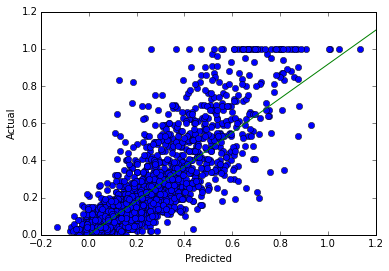

In [38]:
# Plot outputs
%matplotlib inline
pl.plot(p, yy,'bo')
pl.plot([0,1.2],[0,1.1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [39]:
# Create linear regression object
linreg = LinearRegression()

In [40]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    e = p-yy[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [41]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1363


### As shown the RMSE is slightly higher in the 10-fold than the training RMSE. 

## c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function to takes as input the training data and target attribute, the model, and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Once, you have determined the best set of features, run the model with that feature subset on the set-aside test data.  [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target_df, test_size=0.2, random_state=33)
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1595, 97)
y_train (1595,)


In [43]:
from sklearn import feature_selection

In [44]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
X_train_fs = fs.fit_transform(X_train, y_train)

In [45]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)

[ True False  True  True False False False False False False False False  True
 False False  True False  True False  True False False False False False False
 False  True  True  True  True False  True False False False  True False  True
  True False  True  True  True  True False False  True  True False False False
 False False False False False False False False False False False False False
  True  True  True False  True False  True  True False False  True False False
 False False False False False False False False False  True False False False
 False False False False False False]
[  256.03     3.49  1074.89  1412.51     1.96   137.54     4.89    37.33
    15.88     8.25   247.78    11.06   341.63   161.57    40.34   756.01
    22.49   784.57    13.98   366.9    214.99    65.45   126.58    12.32
    29.07    33.37    92.37   400.31   578.82   319.22   472.2    173.37
   533.91   190.47     2.61     7.4    602.77   161.08   704.77   693.14
    24.47  1657.87  1972.8   1342.17  1299.5

In [46]:
df.columns.values

array(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [47]:
print(df.columns[fs.get_support()].values)

['population' 'racepctblack' 'racePctWhite' 'medIncome' 'pctWInvInc'
 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce' 'FemalePctDiv' 'TotalPctDiv'
 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg'
 'PctIlleg' 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant'
 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone' 'NumInShelters']


In [48]:
for i in range(len(df.columns.values)):
    if fs.get_support()[i]:
        print(df.columns.values[i],'\t', fs.scores_[i]) 

population 	 256.032354737
racepctblack 	 1074.88950927
racePctWhite 	 1412.50781239
medIncome 	 341.632537523
pctWInvInc 	 756.014972331
pctWPubAsst 	 784.570640809
medFamInc 	 366.900421844
NumUnderPov 	 400.307856891
PctPopUnderPov 	 578.817365214
PctLess9thGrade 	 319.218108102
PctNotHSGrad 	 472.196207869
PctUnemployed 	 533.913152199
MalePctDivorce 	 602.774893582
FemalePctDiv 	 704.772739005
TotalPctDiv 	 693.137830382
PctFam2Par 	 1657.865017
PctKids2Par 	 1972.80406387
PctYoungKids2Par 	 1342.17361379
PctTeen2Par 	 1299.53510584
NumIlleg 	 431.635560269
PctIlleg 	 1936.12087378
PctPersOwnOccup 	 630.760339374
PctPersDenseHous 	 375.645901876
PctHousLess3BR 	 487.961680842
HousVacant 	 339.968618162
PctHousOwnOcc 	 478.530429718
PctVacantBoarded 	 507.636408542
PctHousNoPhone 	 505.862652747
NumInShelters 	 265.845941875


In [49]:
print(X_train_fs)

[[ 0.01  0.02  0.91 ...,  0.    0.01  0.01]
 [ 0.99  0.59  0.44 ...,  0.86  0.33  0.3 ]
 [ 0.01  0.02  0.95 ...,  0.04  0.02  0.01]
 ..., 
 [ 0.02  0.23  0.76 ...,  0.    0.03  0.  ]
 [ 0.01  0.09  0.77 ...,  0.04  0.06  0.  ]
 [ 0.96  1.    0.   ...,  1.    0.25  1.  ]]


In [50]:
dftable = np.array(X_train_fs)
dftable

array([[ 0.01,  0.02,  0.91, ...,  0.  ,  0.01,  0.01],
       [ 0.99,  0.59,  0.44, ...,  0.86,  0.33,  0.3 ],
       [ 0.01,  0.02,  0.95, ...,  0.04,  0.02,  0.01],
       ..., 
       [ 0.02,  0.23,  0.76, ...,  0.  ,  0.03,  0.  ],
       [ 0.01,  0.09,  0.77, ...,  0.04,  0.06,  0.  ],
       [ 0.96,  1.  ,  0.  , ...,  1.  ,  0.25,  1.  ]])

In [51]:
# In order to do multiple regression we need to add a column of 1s for x0
xs_fs = np.array([np.concatenate((v,[1])) for v in dftable])
ys = y_train

In [56]:
print(len(xs_fs))
print(len(ys))

1595
1595


In [52]:
# First 2 elements of the data
print(xs_fs[:2])

[[ 0.01  0.02  0.91  0.89  0.83  0.02  0.88  0.    0.05  0.06  0.09  0.19  0.22
   0.24  0.23  0.89  0.92  0.97  0.81  0.    0.04  0.86  0.03  0.22  0.01  0.83
   0.    0.01  0.01  1.  ]
 [ 0.99  0.59  0.44  0.2   0.44  0.75  0.21  1.    0.59  0.33  0.49  0.59  0.62
   0.61  0.64  0.18  0.21  0.2   0.16  1.    0.98  0.31  0.2   0.62  0.73  0.31
   0.86  0.33  0.3   1.  ]]


In [53]:
# First 10 elements of the response variable
print(ys[:10])

[ 0.08  0.4   0.02  0.18  0.07  0.33  0.56  0.15  0.22  0.76]


In [54]:
# Create linear regression object
linreg = LinearRegression()

In [55]:
# Train the model using the training sets
model=linreg.fit(xs_fs,ys)

1 -0.112874011634
6 -0.0994326847568
11 -0.0990051051913
16 -0.0990905907953
21 -0.0975068622131
26 -0.0960890453654
31 -0.094784802702
36 -0.09474955355
41 -0.0943537042886
46 -0.0946644176057
51 -0.0949877334678
56 -0.0953208516481
61 -0.0957496688925
66 -0.0957208954492
71 -0.0958313222977
76 -0.0951915736978
81 -0.0954256882754
86 -0.0951362431036
91 -0.095253665816
96 -0.0952762785288
Optimal percentile of features:41 

Optimal number of features:39 



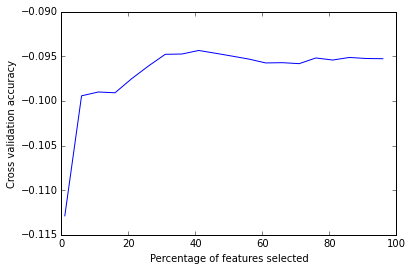

In [63]:
from sklearn import cross_validation
import math

dt = linreg.fit(xs_fs,ys)

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, scoring='mean_absolute_error', cv=5)
    print(i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.max())[0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n")
optimal_num_features = int(math.floor(percentiles[optimal_percentil]*len(df.columns)/100))
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)


### Making the above feature selection and cross validation step into a function

Optimal percentile of features= 41 

Optimal number of features:39 


List of the most informative variables and their weights:

population 	 256.032354737
racepctblack 	 1074.88950927
racePctWhite 	 1412.50781239
numbUrban 	 247.776138548
medIncome 	 341.632537523
pctWInvInc 	 756.014972331
pctWPubAsst 	 784.570640809
medFamInc 	 366.900421844
perCapInc 	 214.993157991
NumUnderPov 	 400.307856891
PctPopUnderPov 	 578.817365214
PctLess9thGrade 	 319.218108102
PctNotHSGrad 	 472.196207869
PctBSorMore 	 173.366843184
PctUnemployed 	 533.913152199
PctEmploy 	 190.465262464
MalePctDivorce 	 602.774893582
FemalePctDiv 	 704.772739005
TotalPctDiv 	 693.137830382
PctFam2Par 	 1657.865017
PctKids2Par 	 1972.80406387
PctYoungKids2Par 	 1342.17361379
PctTeen2Par 	 1299.53510584
NumIlleg 	 431.635560269
PctIlleg 	 1936.12087378
PctLargHouseFam 	 241.23381636
PctPersOwnOccup 	 630.760339374
PctPersDenseHous 	 375.645901876
PctHousLess3BR 	 487.961680842
MedNumBR 	 242.066429948
HousVacant 	 339.96

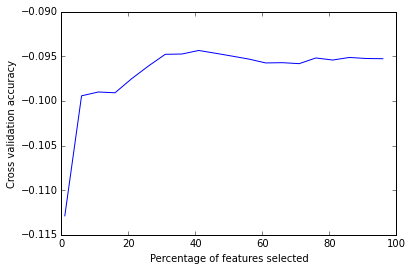

In [104]:
from sklearn import cross_validation
dt = linreg.fit(xs_fs,ys)
percentiles = range(1, 100, 5)
results = []
def find_optimum_percentile_features(dt, X_train, y_train, percentiles, results):

    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X_train, y_train)
        scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, scoring='mean_absolute_error', cv=5)
        # print(i,scores.mean())
        results = np.append(results, scores.mean())

    optimal_percentil = np.where(results == results.max())[0]
    opt_percent=percentiles[optimal_percentil]
    print("Optimal percentile of features= {0}".format(percentiles[optimal_percentil]), "\n")
    optimal_num_features = int(math.floor(percentiles[optimal_percentil]*len(df.columns)/100))
    print("Optimal number of features:{0}".format(optimal_num_features), "\n")
    
    fs = feature_selection.SelectKBest(feature_selection.f_regression, optimal_num_features)
    X_train_fs = fs.fit_transform(X_train, y_train)
    linreg = LinearRegression()
    linreg.fit(X_train_fs,y_train)
    print("\nList of the most informative variables and their weights:\n")
    for i in range(len(df.columns.values)):
        if fs.get_support()[i]:
            print(df.columns.values[i],'\t', fs.scores_[i])
    return results, opt_percent

results, percent = find_optimum_percentile_features(dt, X_train, y_train, percentiles, results)

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)


### Evaluate performance with the new feature set

In [99]:
from sklearn import metrics

fs = feature_selection.SelectKBest(feature_selection.f_regression, optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
linreg = LinearRegression()
linreg.fit(X_train_fs,y_train)
X_test_fs = fs.transform(X_test)

y_pred= linreg.predict(X_test_fs)
print('The variance score is: %.2f' % linreg.score(X_test_fs, y_test))

print("The mean absolute error is: ", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error is: ", metrics.mean_squared_error(y_test, y_pred))

The variance score is: 0.63
The mean absolute error is:  0.101546770499
The mean squared error is:  0.021277222362


## d) Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values, the model to be trained, and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [105]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df, target_df, test_size=0.2, random_state=33)
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1595, 97)
y_train (1595,)


### Create a function to test the different alphas

Ridge Regression
alpha	 RMSE_train	 RMSE_5cv

0.010	 0.1262		 0.1344
0.418	 0.1268		 0.1335
0.826	 0.1273		 0.1334
1.234	 0.1276		 0.1334
1.642	 0.1279		 0.1335
2.050	 0.1281		 0.1335
2.458	 0.1284		 0.1336
2.866	 0.1286		 0.1336
3.274	 0.1288		 0.1337
3.682	 0.1289		 0.1337
4.090	 0.1291		 0.1338
4.498	 0.1292		 0.1339
4.906	 0.1294		 0.1339
5.313	 0.1295		 0.1340
5.721	 0.1296		 0.1340
6.129	 0.1297		 0.1341
6.537	 0.1298		 0.1341
6.945	 0.1299		 0.1341
7.353	 0.1300		 0.1342
7.761	 0.1301		 0.1342
8.169	 0.1302		 0.1343
8.577	 0.1303		 0.1343
8.985	 0.1304		 0.1344
9.393	 0.1305		 0.1344
9.801	 0.1306		 0.1344
10.209	 0.1306		 0.1345
10.617	 0.1307		 0.1345
11.025	 0.1308		 0.1345
11.433	 0.1308		 0.1346
11.841	 0.1309		 0.1346
12.249	 0.1310		 0.1346
12.657	 0.1310		 0.1347
13.065	 0.1311		 0.1347
13.473	 0.1312		 0.1347
13.881	 0.1312		 0.1348
14.289	 0.1313		 0.1348
14.697	 0.1313		 0.1348
15.104	 0.1314		 0.1349
15.512	 0.1314		 0.1349
15.920	 0.1315		 0.1349
16.328	 0.1315		 0.

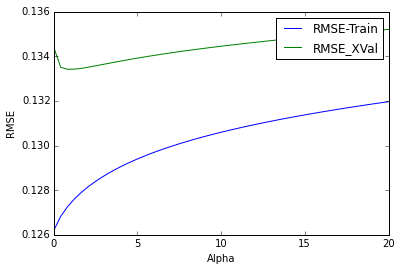

In [70]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_5cv\n')
alpha = np.linspace(.01,20,50)

def find_alphas(X_train, y_train, model, k, alpha):
    t_rmse = np.array([])
    cv_rmse = np.array([])
    for a in alpha:
        MODEL = model(fit_intercept=True, alpha=a)

        # computing the RMSE on training data
        MODEL.fit(X_train,y_train)
        p = MODEL.predict(X_train)
        err = p-y_train
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

        # computing RMSE using 5-fold cross validation
        kf = KFold(len(X_train), n_folds=k)
        xval_err = 0
        for train, test in kf:
            MODEL.fit(X_train[train], y_train[train])
            p = MODEL.predict(X_train[test])
            err = p - y_train[test]
            xval_err += np.dot(err,err)
        rmse_5cv = np.sqrt(xval_err/len(X_train))

        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_5cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_5cv))
    
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()
    return t_rmse, cv_rmse

t_rmse, cv_rmse =find_alphas(X_train, y_train, Ridge, 5, alpha)
    

In [71]:
# Create linear regression object with a ridge coefficient 0.826
ridge = Ridge(fit_intercept=True, alpha=0.826)

# Train the model using the training set
ridge.fit(X_test,y_test)

Ridge(alpha=0.826, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [72]:
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 5-fold x-validation
kf = KFold(len(X_test), n_folds=5)
xval_err = 0
for train,test in kf:
    ridge.fit(X_test[train],y_test[train])
    p = ridge.predict(X_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_5cv = np.sqrt(xval_err/len(X_test))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

Method: Ridge Regression
RMSE on training: 0.1281
RMSE on 5-fold CV: 0.1567


## Lasso

0.010	 0.1520		 0.1523
0.418	 0.2312		 0.2313
0.826	 0.2312		 0.2313
1.234	 0.2312		 0.2313
1.642	 0.2312		 0.2313
2.050	 0.2312		 0.2313
2.458	 0.2312		 0.2313
2.866	 0.2312		 0.2313
3.274	 0.2312		 0.2313
3.682	 0.2312		 0.2313
4.090	 0.2312		 0.2313
4.498	 0.2312		 0.2313
4.906	 0.2312		 0.2313
5.313	 0.2312		 0.2313
5.721	 0.2312		 0.2313
6.129	 0.2312		 0.2313
6.537	 0.2312		 0.2313
6.945	 0.2312		 0.2313
7.353	 0.2312		 0.2313
7.761	 0.2312		 0.2313
8.169	 0.2312		 0.2313
8.577	 0.2312		 0.2313
8.985	 0.2312		 0.2313
9.393	 0.2312		 0.2313
9.801	 0.2312		 0.2313
10.209	 0.2312		 0.2313
10.617	 0.2312		 0.2313
11.025	 0.2312		 0.2313
11.433	 0.2312		 0.2313
11.841	 0.2312		 0.2313
12.249	 0.2312		 0.2313
12.657	 0.2312		 0.2313
13.065	 0.2312		 0.2313
13.473	 0.2312		 0.2313
13.881	 0.2312		 0.2313
14.289	 0.2312		 0.2313
14.697	 0.2312		 0.2313
15.104	 0.2312		 0.2313
15.512	 0.2312		 0.2313
15.920	 0.2312		 0.2313
16.328	 0.2312		 0.2313
16.736	 0.2312		 0.2313
17.144	 0.2312		 

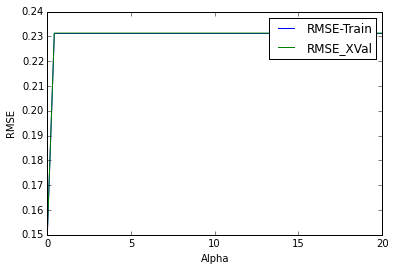

In [206]:
t_rmse, cv_rmse =find_alphas(X_train, y_train, Lasso, 5, alpha)


In [231]:
a = 0.01
for name,met in [
        ('lasso', Lasso(fit_intercept=True, alpha=a))
        ]:
    met.fit(X_test,y_test)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(X_test), n_folds=5)
    err = 0
    for train,test in kf:
        met.fit(X_test[train],y_test[train])
        p = met.predict(X_test[test])
        e = p-y_test[test]
        err += np.dot(e,e)

    rmse_5cv = np.sqrt(err/len(X_test))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 5-fold CV: %.4f' %rmse_5cv)
    print("\n")

Method: lasso
RMSE on training: 0.1632
RMSE on 5-fold CV: 0.1677




### As we can see from the alpha vs rmse graph for Ridge regression, the alpha with the lowest rmse is at .826. Also we can see that the RMSE for training is comparably higher than the RMSE for the k-fold x-validation. On the testing data we find that using alpha=.826 gave us an RMSE training value of .1281 and a RMSE 5-fold CV of .1567. For the lasso the best alpha was at .01 with an RMSE on training of .1632 and an RMSE value on the 5-fold cv of .1677. This is a much lower RMSE than the Ridge, therefore the Lasso regression works better for our dataset than the Ridge.

## e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [73]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df, target_df, test_size=0.2, random_state=33)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1595, 97)
y_train (1595,)
X_test (399, 97)
y_test (399,)


In [75]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_s = scaler.transform(X_train)

sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_s,y_train)
p = sgdreg.predict(x_s)
err = p-y_train
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 5-fold x-validation
kf = KFold(len(X_train), n_folds=5)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(X_train[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(X_train[train])
    xtest_s = scaler.transform(X_train[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y_train[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_train[test]
    xval_err += np.dot(e,e)
rmse_5cv = np.sqrt(xval_err/len(X_train))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1309
RMSE on 5-fold CV: 0.1347


In [76]:
from sklearn.grid_search import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001, 200, 1000),
    'n_iter': [200]
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [196]:
scaler = StandardScaler()
scaler.fit(X_train)
x_s = scaler.transform(X_train)

%time _ = gs.fit(x_s, y_train)

gs.best_params_, gs.best_score_

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:   13.7s
[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:   56.9s
[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:  4.6min
[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed:  7.2min
[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed: 10.5min
[Parallel(n_jobs=1)]: Done 2450 jobs       | elapsed: 14.4min
[Parallel(n_jobs=1)]: Done 3200 jobs       | elapsed: 18.9min
[Parallel(n_jobs=1)]: Done 4050 jobs       | elapsed: 23.9min
[Parallel(n_jobs=1)]: Done 5000 jobs       | elapsed: 29.9min
[Parallel(n_jobs=1)]: Done 6050 jobs       | elapsed: 36.1min
[Parallel(n_jobs=1)]: Done 7200 jobs       | elapsed: 42.9min
[Parallel(n_jobs=1)]: Done 8450 jobs       | elapsed: 50.5min
[Parallel(n_jobs=1)]: Done 9800 jobs       | elapsed: 58.5min
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 59.7min finished


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Wall time: 59min 41s


({'penalty': 'l1', 'n_iter': 200, 'alpha': 0.0001}, 0.65967386421039342)

In [77]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_s = scaler.transform(X_train)

sgdreg = SGDRegressor(penalty='l1', alpha=0.0001, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_s,y_train)
p = sgdreg.predict(x_s)
err = p-y_train
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 5-fold x-validation
kf = KFold(len(X_train), n_folds=5)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(X_train[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(X_train[train])
    xtest_s = scaler.transform(X_train[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y_train[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_train[test]
    xval_err += np.dot(e,e)
rmse_5cv = np.sqrt(xval_err/len(X_train))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1274
RMSE on 5-fold CV: 0.1343


### Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [84]:

def find_alphas(X_train, y_train, model, k, l1_ratioo):
    t_rmse = np.array([])
    cv_rmse = np.array([])
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    x_s = scaler.transform(X_train)
    for a in l1_ratioo:
        MODEL = model(penalty='elasticnet', l1_ratio= a, alpha=0.0001, n_iter=200)

        # Compute RMSE on training data
        MODEL.fit(x_s,y_train)
        p = MODEL.predict(x_s)
        err = p-y_train
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

        # Compute RMSE using 5-fold x-validation
        kf = KFold(len(X_train), n_folds=5)
        xval_err = 0
        for train,test in kf:
            scaler = StandardScaler()
            scaler.fit(X_train[train])  # Don't cheat - fit only on training data
            xtrain_s = scaler.transform(X_train[train])
            xtest_s = scaler.transform(X_train[test])  # apply same transformation to test data
            MODEL.fit(xtrain_s,y_train[train])
            p = MODEL.predict(xtest_s)
            e = p-y_train[test]
            xval_err += np.dot(e,e)
        rmse_5cv = np.sqrt(xval_err/len(X_train))
        
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_5cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_5cv))
    
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()
    return t_rmse, cv_rmse
    

0.000	 0.1274		 0.1348
0.020	 0.1274		 0.1348
0.041	 0.1274		 0.1347
0.061	 0.1274		 0.1347
0.082	 0.1274		 0.1347
0.102	 0.1274		 0.1347
0.122	 0.1274		 0.1347
0.143	 0.1274		 0.1347
0.163	 0.1274		 0.1347
0.184	 0.1274		 0.1347
0.204	 0.1274		 0.1347
0.224	 0.1274		 0.1346
0.245	 0.1274		 0.1346
0.265	 0.1274		 0.1346
0.286	 0.1274		 0.1346
0.306	 0.1274		 0.1346
0.327	 0.1274		 0.1346
0.347	 0.1274		 0.1346
0.367	 0.1274		 0.1345
0.388	 0.1274		 0.1345
0.408	 0.1274		 0.1345
0.429	 0.1274		 0.1345
0.449	 0.1274		 0.1345
0.469	 0.1274		 0.1345
0.490	 0.1274		 0.1345
0.510	 0.1274		 0.1345
0.531	 0.1274		 0.1345
0.551	 0.1274		 0.1345
0.571	 0.1274		 0.1344
0.592	 0.1274		 0.1344
0.612	 0.1274		 0.1344
0.633	 0.1274		 0.1344
0.653	 0.1274		 0.1344
0.673	 0.1274		 0.1344
0.694	 0.1274		 0.1344
0.714	 0.1274		 0.1344
0.735	 0.1274		 0.1344
0.755	 0.1274		 0.1344
0.776	 0.1274		 0.1344
0.796	 0.1274		 0.1344
0.816	 0.1274		 0.1344
0.837	 0.1274		 0.1343
0.857	 0.1274		 0.1343
0.878	 0.12

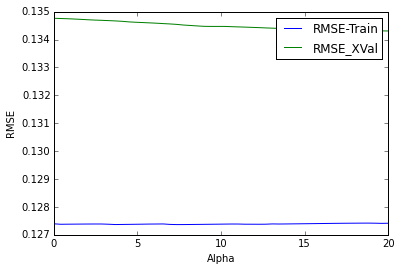

In [85]:
l1_ratio = np.linspace(0,1,50)

t_rmse, cv_rmse =find_alphas(X_train, y_train, SGDRegressor, 5, l1_ratio)

In [81]:
print(len(X_test))
print(len(y_test))

399
399


0.000	 0.1233		 0.1660
0.020	 0.1233		 0.1660
0.041	 0.1233		 0.1660
0.061	 0.1233		 0.1660
0.082	 0.1233		 0.1660
0.102	 0.1234		 0.1659
0.122	 0.1234		 0.1659
0.143	 0.1234		 0.1659
0.163	 0.1234		 0.1659
0.184	 0.1234		 0.1659
0.204	 0.1234		 0.1658
0.224	 0.1234		 0.1658
0.245	 0.1234		 0.1658
0.265	 0.1234		 0.1658
0.286	 0.1234		 0.1658
0.306	 0.1234		 0.1657
0.327	 0.1234		 0.1657
0.347	 0.1234		 0.1657
0.367	 0.1234		 0.1657
0.388	 0.1233		 0.1656
0.408	 0.1233		 0.1656
0.429	 0.1233		 0.1656
0.449	 0.1233		 0.1656
0.469	 0.1233		 0.1655
0.490	 0.1233		 0.1655
0.510	 0.1233		 0.1655
0.531	 0.1233		 0.1654
0.551	 0.1233		 0.1654
0.571	 0.1233		 0.1654
0.592	 0.1232		 0.1654
0.612	 0.1232		 0.1653
0.633	 0.1232		 0.1653
0.653	 0.1232		 0.1653
0.673	 0.1232		 0.1653
0.694	 0.1232		 0.1652
0.714	 0.1232		 0.1652
0.735	 0.1232		 0.1652
0.755	 0.1232		 0.1652
0.776	 0.1232		 0.1651
0.796	 0.1232		 0.1651
0.816	 0.1232		 0.1651
0.837	 0.1232		 0.1651
0.857	 0.1232		 0.1650
0.878	 0.12

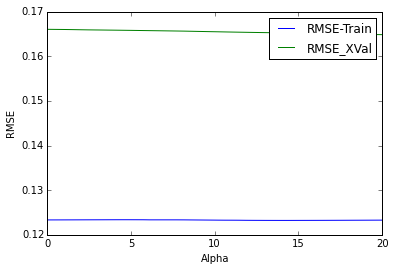

In [86]:
l1_ratio = np.linspace(0,1,50)

t_rmse, cv_rmse =find_alphas(X_test, y_test, SGDRegressor, 5, l1_ratio)

### Viewing the results the gridsearch showed that the best stochastic parameters to use was 'penalty': 'l1', 'n_iter': 200, 'alpha': 0.0001, with a best score of 0.65967386421039342. 

## For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

### Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

### a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [2]:
def cosine_distance(u, v):
    """
    Returns the cosine of the angle between vectors v and u. This is equal to
    u.v / |u||v|.
    """
    return np.dot(u, v) / (np.sqrt(np.dot(u, u)) * np.sqrt(np.dot(v, v)))

In [3]:
from numpy.linalg import norm
def cosine_distance2(x,y):
    return 1-(float(dot(x,y) / (norm(x) * norm(y))))

In [4]:
def cosine_distance3(x, y):
    return float(dot(x,y.T) / (norm(x) * norm(y)))

### b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [14]:
import numpy as np
import pandas as pd
from numpy import * 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [7]:
TD = np.genfromtxt('matrix.txt',usecols=(range(0,2500)),delimiter=',',dtype=int)

In [15]:
terms = genfromtxt('terms.txt',usecols = (range(1)),delimiter='\n', dtype = str)

In [16]:
terms.shape

(9328,)

In [17]:
terms

array(['aa', 'aargh', 'aaron', ..., 'zw', 'zx', 'zz'], 
      dtype='<U30')

In [18]:
classes =np.genfromtxt('classes.txt',delimiter=' ',skip_header=1, dtype=int)
print(classes)
print(classes.shape)

[[   0    0]
 [   1    1]
 [   2    1]
 ..., 
 [2497    3]
 [2498    4]
 [2499    2]]
(2500, 2)


In [19]:
TD

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
TD.shape

(9328, 2500)

In [21]:
terms = np.genfromtxt('terms.txt',delimiter='\n',dtype=str)

In [22]:
terms

array(['aa', 'aargh', 'aaron', ..., 'zw', 'zx', 'zz'], 
      dtype='<U30')

In [23]:
terms.shape

(9328,)

In [24]:
DT = TD.T

In [25]:
DT.shape

(2500, 9328)

In [26]:
NDocs = DT.shape[0]
numTerms=DT.shape[1]

In [27]:
print(numTerms)
print(NDocs)

9328
2500


In [28]:
X_train, X_test, y_train, y_test = train_test_split(DT, classes, test_size=0.2, random_state=33)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test)

X_train (2000, 9328)
y_train (2000, 2)
X_test (500, 9328)
y_test [[1590    2]
 [ 277    2]
 [2297    4]
 [1739    0]
 [ 511    4]
 [  96    1]
 [2259    3]
 [1850    2]
 [1615    2]
 [1467    2]
 [ 257    2]
 [ 237    4]
 [1638    0]
 [1098    4]
 [1412    0]
 [1701    0]
 [1210    1]
 [1355    2]
 [1996    2]
 [1981    0]
 [1333    2]
 [2170    1]
 [2470    4]
 [ 994    0]
 [2131    1]
 [  85    0]
 [ 747    3]
 [ 828    3]
 [1318    4]
 [2103    1]
 [ 547    4]
 [1120    2]
 [1882    1]
 [ 393    4]
 [ 126    0]
 [1890    0]
 [1508    1]
 [ 445    0]
 [ 763    3]
 [1670    3]
 [2396    2]
 [ 380    3]
 [ 675    0]
 [2143    2]
 [ 734    1]
 [  16    0]
 [1266    3]
 [1067    4]
 [1871    2]
 [2124    0]
 [ 388    0]
 [  34    3]
 [1728    0]
 [1801    1]
 [2060    2]
 [1028    3]
 [ 646    1]
 [ 524    1]
 [2301    4]
 [2210    0]
 [ 895    4]
 [ 536    0]
 [ 513    1]
 [1346    4]
 [1743    4]
 [1880    1]
 [1588    0]
 [ 768    1]
 [1260    4]
 [1642    1]
 [1473    4]
 [1191    1]

In [61]:
len(y_test)

500

### c) As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

In [29]:
NDocs = X_train.shape[0]
numTerms=X_train.shape[1]
print(numTerms)
print(NDocs)

9328
2000


In [30]:
TD_train=X_train.T
TD_train.shape

(9328, 2000)

In [31]:
df_train = np.array([(X_train != 0).sum(0)]).T
df_test = np.array([(X_test != 0).sum(0)]).T
DF = df_test + df_train
print(DF)

[[10]
 [ 6]
 [22]
 ..., 
 [ 3]
 [ 3]
 [ 4]]


In [32]:
DF.shape

(9328, 1)

In [33]:
#Create a matrix with all entries = NDocs
NMatrix_train = np.ones(np.shape(TD_train), dtype = float)*NDocs
print(NMatrix_train)

[[ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 ..., 
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]]


In [34]:
def divide(a,b): 
    return a / b

In [35]:
#Convert each entry into IDF values
#Note that IDF is only a function of the term, so all columns with be identical.
import math
IDF_train = np.log2(np.divide(NMatrix_train, DF))
print(IDF_train)

[[ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 [ 8.38082178  8.38082178  8.38082178 ...,  8.38082178  8.38082178
   8.38082178]
 [ 6.50635267  6.50635267  6.50635267 ...,  6.50635267  6.50635267
   6.50635267]
 ..., 
 [ 9.38082178  9.38082178  9.38082178 ...,  9.38082178  9.38082178
   9.38082178]
 [ 9.38082178  9.38082178  9.38082178 ...,  9.38082178  9.38082178
   9.38082178]
 [ 8.96578428  8.96578428  8.96578428 ...,  8.96578428  8.96578428
   8.96578428]]


In [36]:
np.set_printoptions(precision=2,suppress=True, linewidth=120)

In [37]:
TF_IDF_train = TD_train * IDF_train #td
print(TF_IDF_train.shape)
print(TF_IDF_train)

(9328, 2000)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


### For Test

In [38]:
NDocs_test = X_test.shape[0]
numTerms=X_test.shape[1]
TD_test=X_test.T
print("TD shape", TD_test.shape)
print(numTerms)
print(NDocs_test)

TD shape (9328, 500)
9328
500


In [39]:
NMatrix_test = np.ones(np.shape(TD_test), dtype = float)*NDocs_test
print(NMatrix_test)

[[ 500.  500.  500. ...,  500.  500.  500.]
 [ 500.  500.  500. ...,  500.  500.  500.]
 [ 500.  500.  500. ...,  500.  500.  500.]
 ..., 
 [ 500.  500.  500. ...,  500.  500.  500.]
 [ 500.  500.  500. ...,  500.  500.  500.]
 [ 500.  500.  500. ...,  500.  500.  500.]]


In [40]:
IDF_test = np.log2(np.divide(NMatrix_test, DF)) 

In [41]:
TF_IDF_test =  TD_test * IDF_test #td
print(TF_IDF_test.shape)
print(TF_IDF_test)

(9328, 500)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


### d) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term, percentage of docs in the cluster in which the terms appear, and the size of the cluster. Sort the terms in decreasing order of the DF percentage. [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [42]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 


In [43]:
def kMeans(dataSet, k, distMeas=cosine_distance2, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
    #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [44]:
from numpy import *


In [45]:
centroids,clusters =  kMeans(TF_IDF_train.T, 5, distMeas=cosine_distance2, createCent=randCent)

In [46]:
print(centroids)
print(centroids.shape)
print(len(centroids))

[[ 1.27  0.    0.   ...,  1.56  0.78  4.48]
 [ 0.02  0.    0.   ...,  0.    0.    0.  ]
 [ 0.02  0.03  0.04 ...,  0.    0.    0.  ]
 [ 0.02  0.    1.1  ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  1.17  0.    0.  ]]
(5, 9328)
5


In [47]:
print(clusters)
print(clusters.shape)

[[ 2.    0.9 ]
 [ 2.    0.89]
 [ 2.    0.84]
 ..., 
 [ 3.    0.31]
 [ 2.    0.71]
 [ 1.    0.67]]
(2000, 2)


In [48]:
def cluster_analysis(clusters,centroids,N):

    #Separting the documents which are in the same cluster
    clustered_docs = {}
    count=0
    for index,value in enumerate(clusters):
        if value[0] in clustered_docs:
            clustered_docs[value[0]].append(index)
        else:
            clustered_docs[value[0]]=[index]

    cluster_freq={}
    numdocs=len(clusters)
    cluster_def={0:"Windows", 1:"Crypt", 2:"Christian", 3: "Hockey", 4: "Forsale"}
    print("Number of Total Documents", numdocs)
    for index, value in clusters:
        #Five Categories: windows (0), crypt (1), christian (2), hockey (3), forsale (4)
        if index in cluster_freq:
            cluster_freq[index] += 1
        else:
            cluster_freq[index] = 1
    cluster_percentage = {}
    for index, key in enumerate(cluster_freq):
        cluster_percentage[key] = (cluster_freq[key]/numdocs)*100
        print("Cluster",key,": ",cluster_freq[key],"documents ---- Percentage=", (cluster_freq[key]/numdocs)*100, "%")

    # print("Number of Documents in each cluster",cluster_freq)
    # print("Percentage of documents in each cluster", cluster_percentage)  
    print("\n")
    top_terms=[]
    for classlabel in range(len(centroids)):
        topterms=np.array(centroids[classlabel]).argsort()[::-1]
        topNterms= terms[topterms[0:N]]
        top_terms.append((topNterms,topterms[0:N]))
        print("Cluster", classlabel,": ", terms[topterms[0:N]],"\n")


    for row,item in enumerate(top_terms):
        docs_in_cluster=np.sum(len(clustered_docs[row]))
        terms_DF={}
        percent={}
        for idx,top in enumerate(top_terms[row][1].tolist()):
            count=0
            for index,value in enumerate(TD_train[top]):
                if value !=0 and value in clustered_docs[row]: # if the index is in list of docs in cluster
                    count +=1
            terms_DF[top_terms[row][0].tolist()[idx]]=count
            percent[top_terms[row][0].tolist()[idx]]=(count/docs_in_cluster)*100
        print("Cluster",row, "\nDF Terms are:", terms_DF, "\nThe percentage of documents the top terms appears in the cluster is:", percent,"\n")

In [49]:
cluster_analysis(clusters,centroids,5)

Number of Total Documents 2000
Cluster 0.0 :  12 documents ---- Percentage= 0.6 %
Cluster 1.0 :  436 documents ---- Percentage= 21.8 %
Cluster 2.0 :  1158 documents ---- Percentage= 57.9 %
Cluster 3.0 :  386 documents ---- Percentage= 19.3 %
Cluster 4.0 :  8 documents ---- Percentage= 0.4 %


Cluster 0 :  ['db' 'cx' 'uw' 'bh' 'gm'] 

Cluster 1 :  ['kei' 'encrypt' 'anonym' 'chip' 'secur'] 

Cluster 2 :  ['window' 'game' 'team' 'file' 'plai'] 

Cluster 3 :  ['god' 'christian' 'church' 'homosexu' 'jesu'] 

Cluster 4 :  ['ax' 'max' 'pl' 'giz' 'bxn'] 

Cluster 0 
DF Terms are: {'db': 0, 'bh': 0, 'uw': 0, 'cx': 0, 'gm': 0} 
The percentage of documents the top terms appears in the cluster is: {'db': 0.0, 'bh': 0.0, 'uw': 0.0, 'cx': 0.0, 'gm': 0.0} 

Cluster 1 
DF Terms are: {'chip': 12, 'encrypt': 19, 'anonym': 1, 'kei': 16, 'secur': 10} 
The percentage of documents the top terms appears in the cluster is: {'chip': 2.7522935779816518, 'encrypt': 4.3577981651376145, 'anonym': 0.229357798165137

### e) Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [50]:
from sklearn.metrics import completeness_score, homogeneity_score

In [51]:
print(completeness_score(y_train[:,1],clusters[:,0]))

0.804122656702


In [52]:
print(homogeneity_score(y_train[:,1],clusters[:,0]))

0.50905584136


### Looking at the results we can see that the completeness score is fairly good and approaching 1 but there is a very large gap between the completeness score, .74, and the homogeneity score, which was .46. This shows that while a fair percentage of the classes are assigned to the same cluster, each cluster does not contain members or a single class, or at least not so much so.

### f) Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.

In [53]:
import pandas as pd

similarity = []
for centroid in centroids:
    docs = []
    for vector in X_test:
        docs.append(cosine_distance3(centroid,vector))
    similarity.append(docs)
print("Similarity",np.asarray(similarity))



Similarity [[ 0.    0.    0.02 ...,  0.    0.01  0.  ]
 [ 0.07  0.16  0.03 ...,  0.05  0.27  0.03]
 [ 0.07  0.12  0.07 ...,  0.05  0.14  0.03]
 [ 0.17  0.2   0.04 ...,  0.15  0.17  0.01]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


In [70]:
output= pd.DataFrame(np.asarray(similarity).T)
classes_df=pd.DataFrame(y_test[:,1])
output2=pd.concat([output, classes_df], axis=1)
output2.columns=['Cluster1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Class Label']
output2.to_csv('hw_output.csv')

In [71]:
output2

,Cluster1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Class Label
0,0.001912,0.065728,0.073566,0.167901,0.000003,2
1,0.003250,0.160187,0.117467,0.200131,0.000012,2
2,0.018938,0.034394,0.065880,0.039747,0.000014,4
3,0.004662,0.144313,0.272382,0.135630,0.000007,0
4,0.004075,0.039067,0.158549,0.058432,0.000042,4
5,0.004373,0.426657,0.155198,0.123447,0.000008,1
6,0.005197,0.132828,0.305538,0.138141,0.000008,3
7,0.002411,0.138741,0.089763,0.097300,0.000008,2
8,0.004318,0.136889,0.153602,0.523265,0.000006,2
9,0.001814,0.065927,0.098495,0.159237,-0.000001,2
